In [1]:
from pprint import pprint
from pathlib import Path
import numpy as np
import cv2
import yaml
import torch
import matplotlib.pyplot as plt

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

detection_thresh = 0.005
nms_radius = 5

url_def = 'https://raw.githubusercontent.com/magicleap/SuperGluePretrainedNetwork/master/models/superpoint.py'
url_ckpt_ml = 'https://github.com/magicleap/SuperGluePretrainedNetwork/raw/master/models/weights/superpoint_v1.pth'
path_ckpt_ml = 'weights/superpoint_v1_ml.pth'

# 1. Superpoint + superglue

In [2]:
path_img = r'C:\Users\romai\Downloads\SuperPointPretrainedNetwork-master\test_data'
reference_img = r'global_no_bg.png'
moving_img = r'moving.png'

def get_superpoint_features(path_img, name_img):
    os.path.join(path_img, name_img)
    image = cv2.imread(os.path.join(path_img, name_img)).mean(-1) / 255
    torch.hub.download_url_to_file(url_def, 'superpoint_ml.py')
    torch.hub.download_url_to_file(url_ckpt_ml, path_ckpt_ml)

    from superpoint_ml import SuperPoint as SuperPointML
    detection_thresh_ml = detection_thresh / 10  # heuristic
    sp_ml = SuperPointML(dict(keypoint_threshold=detection_thresh_ml, nms_radius=nms_radius)).eval()
    ckpt_ml = torch.load(path_ckpt_ml, map_location='cpu')
    sp_ml.load_state_dict(ckpt_ml)

    pred_ml = sp_ml({'image': torch.from_numpy(image[None,None]).float()})
    points_ml = pred_ml['keypoints'][0]
    descriptors = pred_ml['descriptors'][0]
    print(pred_ml)
    
    plt.imshow(image, cmap = 'gray')
    plt.scatter(*points_ml.T, lw=1, s=6, c='lime');
    plt.gca().set_axis_off()
    plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
    plt.margins(0, 0)
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())

    plt.savefig(os.path.join(path_img, name_img.replace('.png', '') + '_superpoint.png'), transparent=True, bbox_inches="tight", pad_inches=0)
    plt.close()
    
    return np.array(points_ml), descriptors.detach().numpy()

superpoint_reference, superpoint_desc_ref = get_superpoint_features(path_img, reference_img)
superpoint_moving, superpoint_desc_mov = get_superpoint_features(path_img, moving_img)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7.95k/7.95k [00:00<00:00, 8.15MB/s]
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4.96M/4.96M [00:00<00:00, 15.4MB/s]


Loaded SuperPoint model
{'keypoints': [tensor([[117.,   8.],
        [ 22.,   9.],
        [263.,  17.],
        [275.,  19.],
        [377.,  20.],
        [303.,  23.],
        [ 20.,  24.],
        [268.,  37.],
        [283.,  40.],
        [ 34.,  41.],
        [277.,  41.],
        [119.,  43.],
        [271.,  43.],
        [113.,  44.],
        [264.,  45.],
        [356.,  46.],
        [ 42.,  50.],
        [ 88.,  52.],
        [413.,  52.],
        [ 48.,  53.],
        [ 54.,  54.],
        [ 62.,  56.],
        [ 68.,  56.],
        [ 98.,  56.],
        [124.,  56.],
        [250.,  63.],
        [196.,  68.],
        [125.,  69.],
        [304.,  82.],
        [348.,  88.],
        [ 20.,  89.],
        [354.,  90.],
        [ 98.,  91.],
        [360.,  92.],
        [ 53.,  93.],
        [ 89.,  93.],
        [298.,  93.],
        [319.,  98.],
        [ 84., 101.],
        [110., 102.],
        [ 62., 103.],
        [  9., 106.],
        [110., 109.],
        [243., 

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7.95k/7.95k [00:00<00:00, 8.05MB/s]
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4.96M/4.96M [00:00<00:00, 16.0MB/s]


Loaded SuperPoint model
{'keypoints': [tensor([[ 55.,   8.],
        [ 33.,   9.],
        [349.,  10.],
        ...,
        [419., 375.],
        [425., 375.],
        [437., 375.]])], 'scores': (tensor([6.5584e-04, 1.7691e-02, 1.3520e-03, 9.8853e-03, 1.2269e-03, 1.3533e-01,
        1.6408e-02, 1.8947e-01, 4.1900e-03, 2.7491e-01, 7.5153e-03, 1.4643e-01,
        4.7242e-02, 5.1342e-03, 1.9230e-02, 5.3045e-04, 5.2788e-04, 5.3334e-02,
        3.3744e-01, 9.0798e-02, 1.1602e-03, 8.3618e-04, 3.9037e-03, 3.8112e-03,
        1.9504e-01, 7.3938e-02, 6.4652e-03, 1.3710e-01, 2.0030e-03, 9.2693e-04,
        5.6457e-04, 2.1835e-01, 1.8538e-02, 4.3680e-03, 5.3476e-04, 3.3459e-03,
        1.3571e-03, 3.7576e-03, 1.2715e-01, 6.7842e-04, 5.4321e-02, 3.1353e-03,
        9.8876e-04, 2.2581e-03, 5.4242e-02, 5.0009e-04, 1.5658e-01, 2.2308e-03,
        6.9369e-02, 5.4228e-04, 4.0922e-03, 1.1987e-01, 4.5103e-03, 1.1153e-03,
        3.6246e-02, 7.8489e-04, 1.4694e-01, 1.4603e-02, 1.6267e-02, 1.1614e-03,
  

In [92]:
import pickle
with open(r'C:\Users\romai\Documents\repositories\poltilereconstructor\notebooks\sp.pickle', 'wb') as handle:
    pickle.dump([superpoint_reference, superpoint_desc_ref, superpoint_moving, superpoint_desc_mov], handle, protocol=pickle.HIGHEST_PROTOCOL)

In [3]:
def get_sift_features(path_img, name_img):
    reference_image = cv2.imread(os.path.join(path_img, name_img), cv2.IMREAD_GRAYSCALE)
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(reference_image, None)
    
    keypoints_np = [list(orb.pt) for orb in keypoints]
    keypoints_np = np.array(keypoints_np)
    
    plt.imshow(reference_image, cmap = 'gray')
    plt.scatter(*keypoints_np.T, lw=1, s=6, c='lime');
    plt.gca().set_axis_off()
    plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
    plt.margins(0, 0)
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())

    plt.savefig(os.path.join(path_img, name_img.replace('.png', '') + '_sift.png'), transparent=True, bbox_inches="tight", pad_inches=0)
    plt.close()
    
    return keypoints_np, descriptors

sift_reference, sift_desc_ref = get_sift_features(path_img, reference_img)
sift_moving, sift_moving_ref = get_sift_features(path_img, moving_img)

In [4]:
import numpy as np
from PIL import Image
import shutil

def get_d2_net_features(path_img, name_img):
    reference_image_path = os.path.join(path_img, name_img)
    reference_image = cv2.imread(reference_image_path, cv2.IMREAD_GRAYSCALE)
    path_image_d2 = os.path.join(path_img.replace(r'\test_data', ''), 'd2-net-master', 'images')
    shutil.rmtree(path_image_d2, ignore_errors=True)
    os.makedirs(path_image_d2, exist_ok=True)
    Image.open(reference_image_path).convert('RGB').save(os.path.join(path_img.replace(r'\test_data', ''), 'd2-net-master', 'images', name_img.replace('.png', '.jpg')))
    
    path_list_images = os.path.join(path_img.replace(r'\test_data', ''), 'd2-net-master', 'image_list.txt')
    try:
        os.remove(path_list_images)
    except OSError:
        pass
    open(path_list_images, "w").write(os.path.join('images', name_img.replace('.png', '.jpg')))
    
    os.system(r'cd C:\Users\romai\Downloads\SuperPointPretrainedNetwork-master\d2-net-master && python extract_features.py --image_list_file image_list.txt --multiscale')

    try:
        nn = np.load(r'C:\Users\romai\Downloads\d2-net-master\d2-net-master\images\\' + name_img.replace('.png', '.jpg') + '.d2-net')
    except:
        nn = np.load(r'C:\Users\romai\Downloads\d2-net-master\d2-net-master\images\moving.jpg.d2-net')
    descriptors = nn['descriptors']
    keypoints = nn['keypoints']
    nn.close()
    
    plt.imshow(reference_image, cmap = 'gray')
    plt.scatter(*keypoints[:,:2].T, lw=1, s=1, c='lime');
    plt.gca().set_axis_off()
    plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
    plt.margins(0, 0)
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())

    plt.savefig(os.path.join(path_img, name_img.replace('.png', '') + '_d2-net.png'), transparent=True, bbox_inches="tight", pad_inches=0)
    plt.close()
    
    return descriptors, keypoints

d2_net_desc_reference, d2_net_reference = get_d2_net_features(path_img, reference_img)
d2_net_desc_moving, d2_net_moving = get_d2_net_features(path_img, moving_img)

In [14]:
import numpy as np
import cv2

def compute_distance_matrix(desc1, desc2):
    """
    Compute the Euclidean distance matrix between two sets of descriptors.
    """
    # Expand dimensions to enable broadcasting
    desc1_exp = desc2[:, np.newaxis, :] 
    desc2_exp = desc1[np.newaxis, :, :]
    
    # Compute squared Euclidean distances
    dists_sq = np.sum((desc1_exp - desc2_exp) ** 2, axis=2)
    return np.sqrt(dists_sq)

def mutual_nn_constraint(desc1, desc2, ratio_thresh=0.8):
    # Compute the distance matrix
    dist_matrix = compute_distance_matrix(desc1, desc2)
    
    # Find the nearest neighbor for each descriptor in desc1
    nn1 = np.argmin(dist_matrix, axis=1)
    nn1_dist = np.min(dist_matrix, axis=1)
    
    # Find the nearest neighbor for each descriptor in desc2
    nn2 = np.argmin(dist_matrix, axis=0)
    nn2_dist = np.min(dist_matrix, axis=0)
    
    # Apply ratio test to reject ambiguous matches
    # Compute second nearest neighbor distances for ratio test
    sorted_distances = np.sort(dist_matrix, axis=1)
    second_nn_dist = sorted_distances[:, 1]
    ratio_test_mask = nn1_dist / second_nn_dist < ratio_thresh
    
    # Apply mutual NN constraint
    mutual_matches = []
    for i in range(len(nn1)):
        if ratio_test_mask[i] and nn2[nn1[i]] == i:
            mutual_matches.append((i, nn1[i]))
    
    return mutual_matches

def remove_outliers(points_ref, point_mov, matches):
    points1 = []
    points2 = []

    for match in matches:
        points1.append(superpoint_reference[match[0]])
        points2.append(superpoint_moving[match[1]])

    points1 = np.array(points1)
    points2 = np.array(points2)
    
    def angle_with_horizontal(vector):
        x, y = vector
        angle_rad = np.arctan2(y, x)  # Returns the angle in radians
        angle_deg = np.degrees(angle_rad)  # Convert to degrees
        return angle_deg
    
    keep = []
    threshold = 0.5

    for idx in range(len(points1)):
        dist = points1[idx] - points1
        distances = np.linalg.norm(dist, axis=1)
        idxs = np.argpartition(distances, 7)
        summed = np.sum(dist[idxs[:7]], axis = 0)
        distance_ref = np.linalg.norm(summed)

        dist = points2[idx] - points2
        summed = np.sum(dist[idxs[:7]], axis = 0)
        distance_mov = np.linalg.norm(summed)
        
        keep.append( distance_ref / distance_mov > threshold and distance_mov / distance_ref < 1 / threshold )
    
    return keep

def match_nn_constraint(desc1, desc2, points_ref, points_mov):
    matches = mutual_nn_constraint(desc1, desc2)
    if len(matches) <= 6:
        return matches
    
    keep = remove_outliers(points_ref, points_mov, matches)
    checked_matches = []
    for m, k in zip(matches, keep):
        if k:
            checked_matches.append(m)
        else:
            pass
    return checked_matches
    
matches = match_nn_constraint(superpoint_desc_mov.T, superpoint_desc_ref.T, superpoint_moving, superpoint_reference)

In [42]:
desc_mov

array([[ 0.03794884, -0.14752576,  0.12640767, ..., -0.08738686,
        -0.0066765 , -0.02487617],
       [-0.00941688, -0.10440342,  0.08780459, ..., -0.15667838,
        -0.092186  ,  0.02655334],
       [ 0.01808358, -0.06367446,  0.03074991, ..., -0.19986103,
         0.00983629,  0.13902465],
       ...,
       [-0.05857727, -0.0671254 ,  0.04767241, ..., -0.01330725,
        -0.01752239, -0.02504313],
       [ 0.01103678, -0.04943764,  0.0872133 , ..., -0.06119272,
         0.01855038,  0.1081008 ],
       [ 0.04509059, -0.05394118, -0.03442842, ..., -0.23332787,
        -0.07832304,  0.02431815]], dtype=float32)

In [43]:
superpoint_desc_mov.T

array([[ 4.8051212e-02,  2.3111565e-02, -5.1590469e-02, ...,
        -1.4790739e-01, -4.1109881e-05, -3.6402855e-02],
       [-2.1551840e-02, -1.2386995e-01,  8.0299176e-02, ...,
         2.4864761e-02, -1.9218817e-02, -6.4971913e-03],
       [ 3.9864201e-02, -5.8213916e-02, -4.8221108e-02, ...,
        -6.6504456e-02, -1.0114932e-01,  6.8179272e-02],
       ...,
       [-2.6490143e-02, -3.4422740e-02,  5.6128643e-02, ...,
        -2.7449446e-02, -7.6067420e-03, -3.4908202e-02],
       [-5.4685384e-02,  6.6569820e-03,  5.0331816e-02, ...,
        -1.8009679e-02,  4.8418487e-03, -1.6469775e-02],
       [-4.8419442e-02,  2.4631871e-02,  8.3159164e-02, ...,
         1.1550863e-02, -7.7661884e-04, -2.0093629e-03]], dtype=float32)

In [52]:
def match_nn_constraint(desc1, desc2, points_ref, points_mov):
    matches = mutual_nn_constraint(desc1, desc2)
    if len(matches) <= 6:
        return matches
    
    keep = remove_outliers(points_ref, points_mov, matches)
    checked_matches = []
    for m, k in zip(matches, keep):
        if k:
            checked_matches.append(m)
        else:
            pass
    return checked_matches
    
matches = match_nn_constraint(superpoint_desc_mov.T, superpoint_desc_ref.T, superpoint_moving, superpoint_reference)

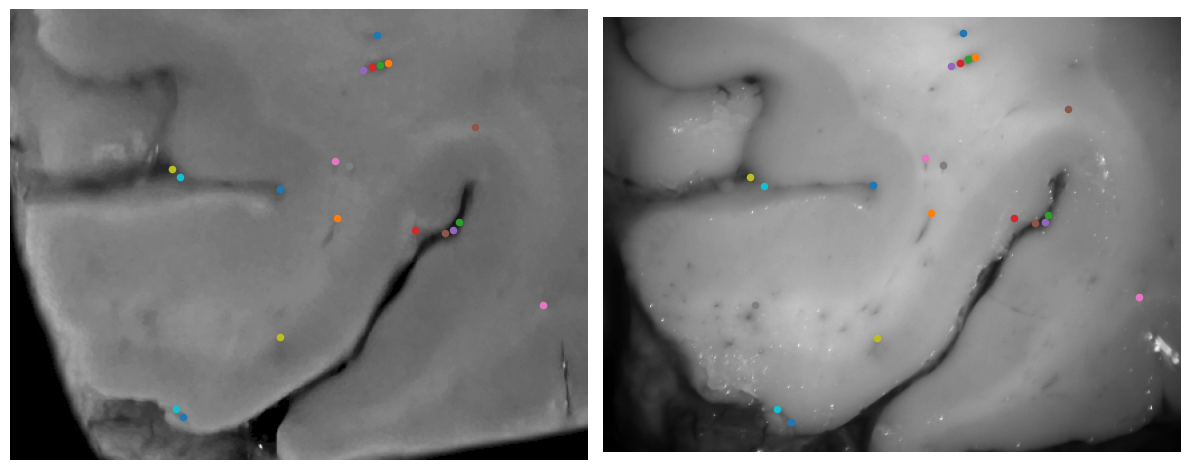

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].imshow(cv2.imread(os.path.join(path_img, reference_img), cv2.IMREAD_GRAYSCALE), cmap = 'gray')
for idx, match in enumerate(matches):
    ax[0].scatter(*superpoint_reference[match[0]], s=20)
        
ax[0].axis('off')  # Remove ticks


ax[1].imshow(cv2.imread(os.path.join(path_img, moving_img), cv2.IMREAD_GRAYSCALE), cmap = 'gray')
for idx, match in enumerate(matches):
    ax[1].scatter(*superpoint_moving[match[1]], s=20)
ax[1].axis('off')  # Remove ticks
    
plt.tight_layout()
plt.show()


In [55]:
matches = match_nn_constraint(sift_desc_ref, sift_moving_ref, sift_reference, sift_moving)

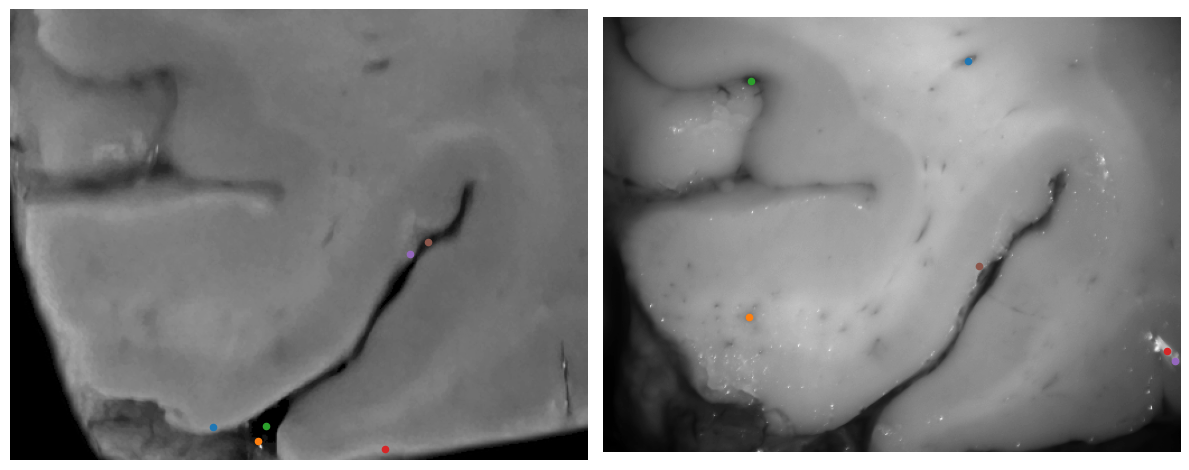

In [56]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].imshow(cv2.imread(os.path.join(path_img, reference_img), cv2.IMREAD_GRAYSCALE), cmap = 'gray')
for idx, match in enumerate(matches):
    ax[0].scatter(*sift_reference[match[0]], s=20)
        
ax[0].axis('off')  # Remove ticks


ax[1].imshow(cv2.imread(os.path.join(path_img, moving_img), cv2.IMREAD_GRAYSCALE), cmap = 'gray')
for idx, match in enumerate(matches):
    ax[1].scatter(*sift_moving[match[1]], s=20)
ax[1].axis('off')  # Remove ticks
    
plt.tight_layout()
plt.show()


In [82]:
matches = match_nn_constraint(d2_net_desc_reference, d2_net_desc_moving, d2_net_reference, d2_net_moving)

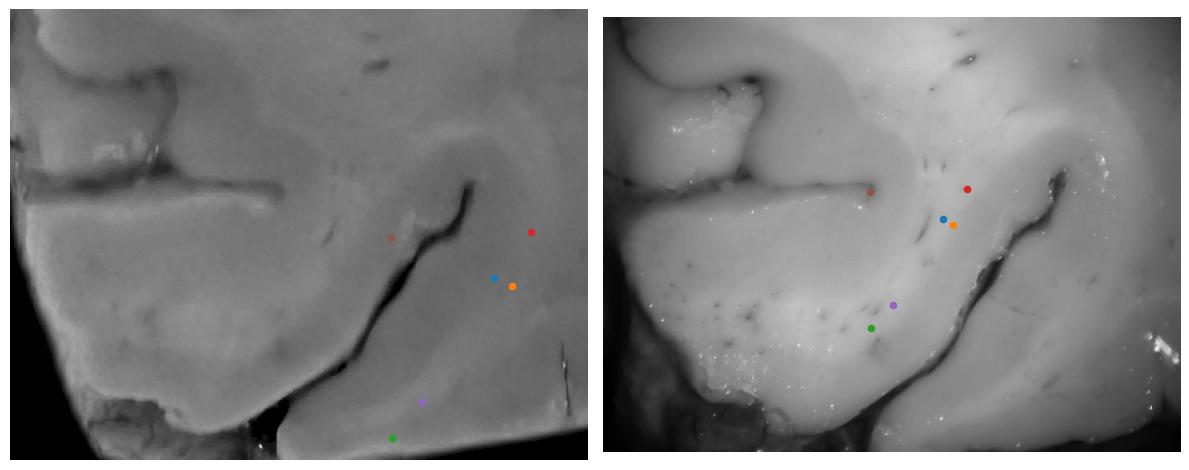

In [83]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].imshow(cv2.imread(os.path.join(path_img, reference_img), cv2.IMREAD_GRAYSCALE), cmap = 'gray')
for idx, match in enumerate(matches):
    ax[0].scatter(*d2_net_moving[:,:2][match[0]], s=20)
        
ax[0].axis('off')  # Remove ticks


ax[1].imshow(cv2.imread(os.path.join(path_img, moving_img), cv2.IMREAD_GRAYSCALE), cmap = 'gray')
for idx, match in enumerate(matches):
    ax[1].scatter(*d2_net_reference[:,:2][match[1]], s=20)
ax[1].axis('off')  # Remove ticks
    
plt.tight_layout()
plt.show()